# Autonomní systémy



```{admonition} Co se dozvíte v tomto textu

![](pics/bear.jpg)

V této kapitole zkombinujeme aparát lineární algebry a diferenciálních rovnic a budeme se věnovat problematice soustav diferenciálních rovnic. Jedna z aplikací této teorie je modelování interakce dravce a kořisti. Pochopení principů této interakce je zásadní nejenom pro ochranu populace dravce či jeho kořisti, ale také pro zajištění toho, že případné zásahy do této rovnováhy nebudou mít nečekaný efekt. Seznámíme se s takzvaným Volterrovým efektem, kdy se snaha vymýtit nepohodlný živočišný druh může obrátit v populační explozi tohoto druhu. 

*Foto: Medvěd ulovil kořist. Model dravce a kořisti (nebo analogické modely býložravce a rostliny, případně parazita a hostitele) je jedním ze základních ekologických modelů. Autor Jean Beaufort, <https://www.publicdomainpictures.net/>.*
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp
from scipy.signal import find_peaks

Autonomní systémy diferenciálních rovnic jsou soustavy diferenciálních rovnic,
kde každá rovnice obsahuje na levé straně derivaci jedné závislé proměnné a na
pravé straně funkci všech závislých proměnných. Nezávislou proměnnou je
zpravidla čas. To znamená, že pravá strana nezávisí na čase. V případě
dvourozměrného autonomního systému se tedy jedná o soustavu diferenciálních
rovnic ve tvaru 

$$\begin{aligned} \frac{\mathrm dx}{\mathrm dt}&= f(x,y), \\ \frac{\mathrm dy}{\mathrm dt}&= g(x,y), \end{aligned}
$$ (as_rovina)

kde $f$ a $g$ jsou funkce dvou proměnných. Řešením je dvojice funkcí $x(t)$ a
$y(t)$, které vyhovují těmto rovnicím. Počáteční podmínku zpravidla formulujeme
ve tvaru $x(0)=x_0$ a $y(0)=y_0$, kde $x_0$ a $y_0$ jsou reálná čísla. 

Nejprve se seznámíme s jedním ze základních autonomních systémů používaných v
ekologii a poté si zformalizujeme obecný přístup.


## Lotkův–Volterrův model dravce a kořisti

Jednoduchým modelem dravce a kořisti je Lotkův–Volterrův model, který byl
sestaven k vysvětlení fenoménu, že při omezení rybolovu během první světové
války se v úlovcích zvýšilo procento dravých ryb. Tedy, že omezení rybolovu
vedlo k nárůstu populace predátorů. Jinými slovy, lov má pozitivní vliv na
populaci kořisti (její relativní velikost vzhledem k populaci dravce), zatímco
ukončení lovu má pozitivní vliv na populaci dravce (opět ve smyslu relativní
velikosti v porovnání s populací kořisti). Tento efekt se nazývá Volterrův efekt
a je jednoduchým důsledkem vzájemné interakce mezi oběma živočišnými druhy. 


```{margin} Model predace

[![](https://user.mendelu.cz/marik/manim/thumbs/Predator_prey.jpg)](https://user.mendelu.cz/marik/manim/Predator_prey/)

Lotkův–Volterrův model dravce a kořisti byl jedním z prvních úspěšných modelů populační ekologie. 

```


Model vychází z jednoduché myšlenky, že populace kořisti roste rychlostí úměrnou
velikosti (neuvažujeme vnitrodruhovou konkurenci, to je realistické například
pokud predátor udržuje velikost populace pod nosnou kapacitou prostředí) a
kořist je působením predátora odebírána rychlostí úměrnou velikosti populace
dravce a populace kořisti (více dravců více omezí růst populace a dravci jsou v
lovu úspěšnější, pokud je kořisti více). Populace predátora bez přítomnosti
kořisti klesá rychlostí úměrnou velikosti populace predátora a přítomnost
kořisti se projeví v růstu populace predátora pozitivním faktorem. Podobně jako
u kořisti, předpokládejme, že tento faktor je úměrný velikosti populace kořisti
i predátora. Matematicky zapsáno, soužití kořisti a dravce je modelováno
soustavou rovnic
$$
\begin{aligned}\frac{\mathrm dx}{\mathrm dt}&=ax-bxy\\\frac{\mathrm dy}{\mathrm dt}&=-cy+dxy\end{aligned}
$$

Nápověda příkazu `solve_ivp` obsahuje řešení Lotkova–Volterrova modelu. Řešení
jsou periodické funkce, za maximem kořisti následuje maximum dravce a pokles
populace kořisti. Malý stav kořisti způsobí pokles populace dravce, který nemá
dost potravy. To uvolní prostor pro růst populace kořisti. Hojnost kořisti ovšem
podpoří populaci dravce, která začne se zpožděním růst kopírovat. Mnoho dravců
ale hodně uloví a tím se růst populace kořisti zastaví a nastane pokles. Tím se
cyklus uzavře.

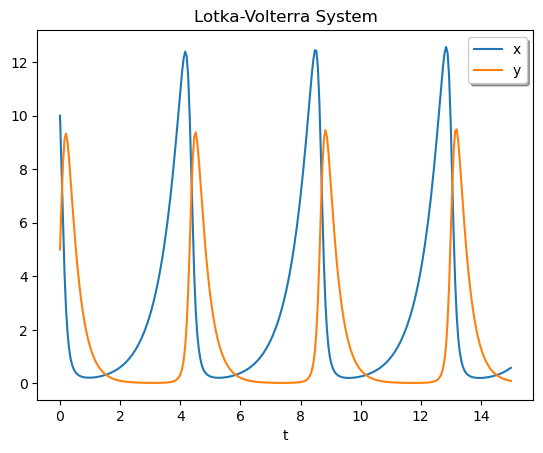

In [2]:
def lotkavolterra(t, z, a, b, c, d):
    x, y = z
    return [a*x - b*x*y, -c*y + d*x*y]

t = np.linspace(0, 15, 300)
sol = solve_ivp(
    lambda t,z:lotkavolterra(t,z, a=1.5, b=1, c=3, d=1), 
    [0, 15], # interval pro reseni
    [10, 5], # pocatecn podminka
    t_eval=t
)

plt.plot(t, sol.y.T)
plt.xlabel('t')
plt.legend(['x', 'y'], shadow=True)
plt.title('Lotka-Volterra System')
plt.show()

Rovnovážný stav systému je řešením soustavy rovnic 
$$
\begin{aligned}0&=ax-bxy,\\0&=-cy+dxy.\end{aligned}
$$
Za přirozeného předpokladu $x>0$ a $y>0$ (obě populace jsou přítomny) je možné tento systém vydělit do tvaru 
$$
\begin{aligned}0&=a-by,\\0&=-c+dx,\end{aligned}
$$
odkud plyne $x=\frac cd$ a $y=\frac ab$. To je zajímavé. Rovnovážný stav kořisti je určen parametry růstu populace dravce a rovnovážný stav dravce je vyjádřen pomocí parametrů růstu populace kořisti. 

Pro jiný způsob vizualizace můžeme funkce udávající velikosti populací v čase
uvažovat jako parametrické křivky v prostoru dravce a kořisti. Tento prostor se
nazývá fázovým prostorem a křivky odpovídající řešení se nazývají trajektorie.
Vodorovně budeme vynášet velikost populace kořisti, svisle velikost populace dravce.

Vektor z pravých stran, udávající rychlost růstu populací, je tečným vektorem k
trajektoriím. Pokud má tento vektor jednu komponentu nulovou, míří vodorovně nebo
svisle a tím stejným směrem míří v daném bodě trajektorie. Vektorové pole
definované pravou stranou systému se nazývá *směrové pole*.

Body, kde je alespoň jedna z pravých stran nulová vytváří v rovině systém křivek, nazývaných nulkliny.
Body s nulovou pravou stranou první rovnice odpovídají bodům, ve kterých neroste
první populace (kořist) a trajektorie míří svisle. Tyto body vytvoří nulklinu
kořisti. Trajektorie protínají nulklinu kořisti svisle. Body s nulovou pravou
stranou druhé rovnice tvoří nulklinu dravce a trajektorie ji protínají
vodorovně.

V průsečíku nulklin je bod, kdy jsou obě pravé strany nulové a obě populace se
nemění (mění se nulovou rychlostí). Tento bod se nazývá stacionární bod a
odpovídá konstantnímu řešení. Ostatní nekonstantní řešení okolo stacionárního
bodu obíhají v cyklech. 

Pro více informací zakreslíme do fázového prostoru nejenom řešení, ale i nulkliny a směrové pole. Nulklinou kořisti (křivka kdy je růst kořisti nulový) je přímka $y=a/b$, tj. vodorovná přímka procházející stacionárním bodem. Každá trajektorie tuto přímku protíná svisle. 
Nulklinou dravce (křivka kdy je růst dravce nulový) je přímka $x=c/d$, tj. svislá přímka procházející stacionárním bodem. Každá trajektorie tuto přímku protíná vodorovně. Všechny trajektorie jsou uzavřené cykly. Na obrázku je několik částí těchto trajektorií vykreslených příkazem `streamplot` a jedna celá trajektorie ve tvaru cyklu.

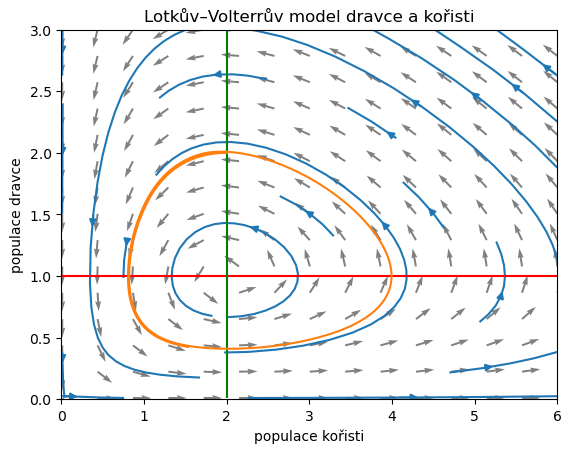

In [3]:
def korist(x,y,a=1,b=1):
    return a*x - b*x*y

def dravec(x,y,c=1,d=0.5):
    return -c*y+d*x*y

def model(t,X,a=1,b=1,c=1,d=0.5):
    x,y = X
    return [korist(x,y,a,b),dravec(x,y,c,d)]
meze = [0,10]
pocatecni_podminka = [2,2]

xmax = 6
ymax = 3
x, y = np.meshgrid(np.linspace(0.01, xmax, 15), 
                   np.linspace(0.01, ymax, 15))

# Komponenty vektoroveho pole
u,v = model(0,[x,y])
M = np.sqrt(u**2+v**2) # velikost vektoru

fig,ax = plt.subplots()
ax.quiver(x,y,u/M,v/M,color='gray',units='xy', angles='xy') # vykresleni s jednotkovou delkou
integralni_krivky = ax.streamplot(x, y, u, v, density=0.3)

t = np.linspace(*meze,800)
reseni = solve_ivp(model,
                   meze,
                   pocatecni_podminka,
                   t_eval = t
                  )

x, y = np.meshgrid(np.linspace(0.01, xmax, 40), 
                   np.linspace(0.01, ymax, 40))

x_nulcline = plt.contour(x, y, korist(x,y), [0], colors='red')
y_nulcline = plt.contour(x, y, dravec(x,y), [0], colors='green')

ax.plot(*reseni.y)
ax.set(
    ylim=(0,None), 
    xlim=(0,None),
xlabel="populace kořisti",
ylabel="populace dravce",
title="Lotkův–Volterrův model dravce a kořisti");

## Volterrův efekt

Na uvedeném modelu si můžeme demonstrovat Volterrův efekt. Toto je situace, kdy
zásah proti škůdcům s cílem redukovat jejich populaci může v dlouhodobém měřítku
paradoxně vyvolat přemnožení těchto škůdců. Například použití insekticidu nebo
pesticidu může krátkodobé snížit populaci, kterou se snažíme redukovat, ale
pokud jsou na použitou látku citliví i predátoři, živící se tímto škůdcem, dojde
k výrazné redukci i u populace predátorů. To znamená, že škůdce ztratí svého
přirozeného nepřítele a tím je mu umožněn nejen nárůst na původní hodnoty, ale i
přemnožení. V konečném důsledku dojde k přemnožení populace škůdce, jehož počty
jsme postřikem chtěli redukovat

Volterrův efekt byl vlastně i motivací pro sestavení modelu. Na tento efekt a
zajímavé zvýšení procenta dravých ryb v sítích po omezení rybolovu během první
světové války Volterru upozornil jeho zeť, biolog Umberto d'Ancona.

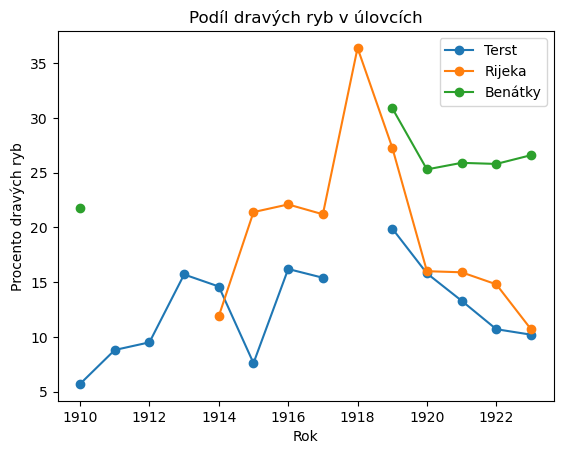

In [4]:
data = {
    'Rok':np.arange(1910,1924),
    'Terst':[5.7, 8.8, 9.5, 15.7, 14.6, 7.6, 16.2, 15.4, None, 19.9, 15.8, 13.3, 10.7, 10.2],
    'Rijeka':[None, None, None, None, 11.9, 21.4, 22.1, 21.2, 36.4, 27.3, 16.0, 15.9, 14.8, 10.7],
    'Benátky':[21.8, None, None, None, None, None, None, None, None, 30.9, 25.3, 25.9, 25.8, 26.6]
}
df = pd.DataFrame(data)
ax = df.plot(x="Rok",style="o-")
ax.set(title="Podíl dravých ryb v úlovcích", ylabel="Procento dravých ryb");
# Podle Nicolas Bacaër, A Short History of Mathematical Population Dynamics

Budeme základní model modifikovat tak, že do populace kořisti i dravce přidáme
lov s konstantním úsilím, tj. úměrný lovené populaci. Například pro lov ryb to
věrně modeluje situaci, že procento dravých ryb uvízlých v rybářských sítích
roste s tím, jak roste procento dravých ryb v mořích celkově. 

```{margin} Nepovedený boj se škůdci

![](pics/msice_zelna.jpg)

Jako lov můžeme interpretovat i jiné 
odstraňování části populace. 
Je-li hmyzí škůdce kořistí pro predátora, 
můžeme i likvidaci tohoto škůdce použitím 
insekticidů interpretovat jako lov. Pokud 
insekticid působí i na predátora, je situace 
stejná jako u Lotkova–Volterrova modelu s lovem 
obou populací. Lov paradoxně zvýší populaci 
kořisti, tedy škůdce. Ochrana před škůdcem 
pomocí insekticidu má tedy přesně opačný účinek.

*Například první komerční postřik para-oxonem 
nesmírně účinně hubil v Anglii populace mšice 
zelné, Brevicoryne brassicae. Že však současně 
byli ničeni i přirození nepřátelé, vedlo do 
dvou týdnů k největší populační explozi tohoto 
druhu mšice v celé anglické historii* 
({cite}`begon` str. 564).
```

Fázový portrét ukazuje, že s vyšší intenzitou lovu se stacionární bod, okolo 
kterého trajektorie obíhají, posunuje doprava dolů. Tedy do míst s vyšší 
populací kořisti a menší populací dravce.

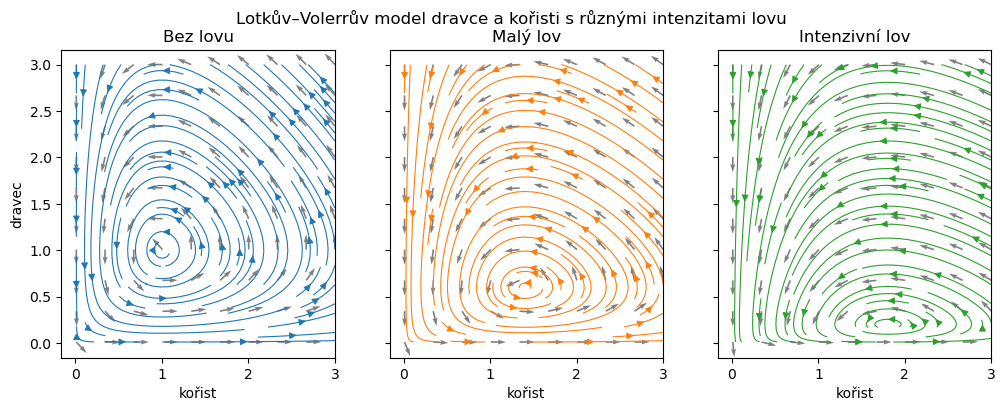

In [5]:
def predator(x,y,c=1,d=1,h=0):
    return -c*y + d*x*y - h*y

def prey(x,y,a=1,b=1,h=0):
    return a*x - b*x*y - h*x

def model(t,X,h=0,a=1,b=1,c=1,d=1):
    x,y = X
    return [prey(x,y,a,b,h),predator(x,y,c,d,h)]

xmax = 3
ymax = 3
x, y = np.meshgrid(np.linspace(0.01, xmax, 10), 
                   np.linspace(0.01, ymax, 10))

fig,axs = plt.subplots(1,3,sharex=True, sharey=True, figsize=(12,4))

for i,h in enumerate([0,0.4,0.8]):
    u,v = model(0,[x,y],h)
    M = np.sqrt(u**2+v**2) # velikost vektoru
    ax = axs[i]
    ax.quiver(x,y,u/M,v/M,color='gray',units='xy', angles='xy') # vykresleni s jednotkovou delkou
    ax.streamplot(x, y, u, v, density=1, color=f"C{i}", linewidth=0.8)

axs[0].set(
    xlabel="kořist",
    ylabel="dravec",
    title="Bez lovu"
);
axs[1].set(
    xlabel="kořist",
    title="Malý lov"
)
axs[2].set(
    xlabel="kořist",
    title="Intenzivní lov"
)
plt.suptitle("Lotkův–Volerrův model dravce a kořisti s různými intenzitami lovu");

Pro kontrolu ještě prozkoumáme časový vývoj populací pro různé intenzity lovu. 
Výpočty uložíme do tabulky s hierarchickým indexováním sloupců a poté vykreslíme a použijeme k výpočtu střední hodnoty.

In [6]:
def predator(x,y,c=1,d=1,h=0):
    return -c*y + d*x*y - h*y

def prey(x,y,a=1,b=1,h=0):
    return a*x - b*x*y - h*x

def model(t,X,h=0,a=1,b=2,c=1,d=1):
    x,y = X
    return [prey(x,y,a,b,h),predator(x,y,c,d,h)]

pocatecni_podminka = [0.5,0.4]
meze = [0,30]
t=np.linspace(*meze, 500)  
lovy = [0,0.25,0.5]
druhy_populaci = ["kořist","dravec"]

idx = pd.MultiIndex.from_tuples([],names = ['intenzita lovu','nazev populace'])
df = pd.DataFrame(columns=idx, index=t)

for h in lovy:
     df[[(h,kdo) for kdo in druhy_populaci]] = solve_ivp(
                   lambda t,x:model(t,x,h=h),
                   meze,
                   pocatecni_podminka,
                   t_eval=t,
                   ).y.T
df.head()        

intenzita lovu      0.00                0.25                0.50          
nazev populace    kořist    dravec    kořist    dravec    kořist    dravec
0.000000        0.500000  0.400000  0.500000  0.400000  0.500000  0.400000
0.060120        0.506409  0.388228  0.499032  0.382351  0.491761  0.376564
0.120240        0.513611  0.376957  0.499101  0.365472  0.484981  0.354344
0.180361        0.521600  0.366181  0.500137  0.349361  0.479437  0.333339
0.240481        0.530374  0.355895  0.502101  0.334001  0.475045  0.313506

Data vykreslíme, najdeme střední hodnotu a tuto střední hodnotu přidáme do
obrázku. Můžeme sledovat, jaký má lov vliv na oscilace (jejich amplitudu a
frekvenci) a zejména na střední hodnotu, okolo které řešení oscilují.
Matematickým rozborem je možné ukázat, že střední hodnota je vlastností daného
autonomního systému a je pro všechna řešení stejná a shoduje se se stacionárním
bodem. Naproti tomu amplituda a frekvence se u různých řešení téhož autonomního
systému může lišit.

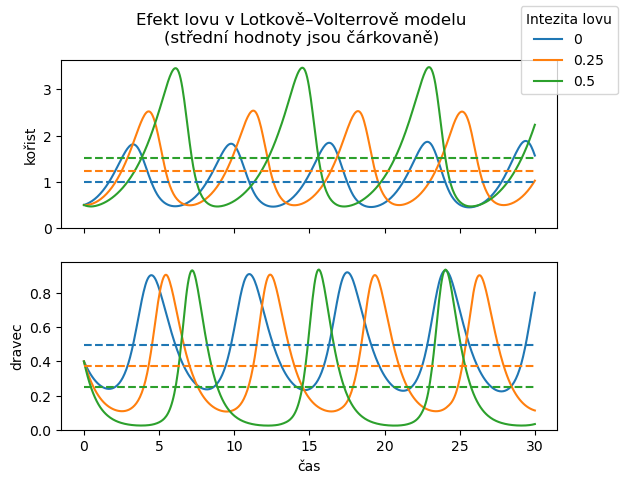

In [7]:
# Dva obrázky nad sebou se sdílenou vodorovnou osou
fig,ax = plt.subplots(2,1,sharex=True)

# Grafy do dvou obrázků podle druhu populace
for a,kdo in zip(ax,druhy_populaci):
    data = df.xs(level=1,key=kdo, axis=1)
    a.plot(t,data)
    a.set(ylabel=kdo, ylim=(0,None))   

# Výpočet středních hodnot a vykreslení do grafu
for a,kdo in zip(ax,druhy_populaci):    # Cyklus přes populace
    for j,h in enumerate(lovy):            # Cyklus přes intenzity lovu
        data = df[h,kdo]          # Data pro danou populaci a intenzitu lovu
        meze = find_peaks(data)[0][0:2]  # Nalezení prvních dvou maxim
        prumer = np.mean(data.iloc[meze[0]:meze[1]]) # Průměrná hodnota
        a.plot([t[0],t[-1]],[prumer,prumer],"--", color=f"C{j}")
        
fig.legend(lovy,title="Intezita lovu")    
ax[1].set(xlabel="čas")
plt.suptitle("Efekt lovu v Lotkově–Volterrově modelu\n(střední hodnoty jsou čárkovaně)");

## Střípky z obecné teorie autonomních systémů 

### Lineární autonomní systémy

Soustava $n$ diferenciálních rovnic tvaru $$\frac{\mathrm dX}{\mathrm dt}=AX + B,$$ kde $X$ a $B$ jsou $n$-rozměrné sloupcové vektory a $A$ je $n$-rozměrná čtvercová matice je lineární autonomní systém. 

Je-li $X_0$ řešením rovnice $$AX+B=0,$$ je konstantní funkce $X(t)=X_0$ řešením této rovnice. Toto řešení se nazývá *stacionární bod*.

Protože po substituci $Y=X-X_0$ se rovnice transformuje na rovnici $$\frac{\mathrm dY}{\mathrm dt}=AY,$$ můžeme bez újmy na obecnosti předpokládat, že $B$ je nulový vektor a studovat rovnici ve tvaru 

$$
\frac{\mathrm dX}{\mathrm dt}=AX
$$ (as-hom) 

se stacionárním bodem v počátku. Rovnice má následující vlastnosti.

* Lineární kombinace libovolného počtu řešení rovnice {eq}`as-hom` je také řešením této rovnice. 
* Je-li $\lambda$ vlastním číslem matice $A$ a $U$ je příslušný vlastní vektor, je funkce $X(t)=e^{\lambda t}U$ řešením rovnice {eq}`as-hom`. Jsou-li $\lambda$ a $U$ komplexní, je řešením rovnice samostatně reálná i imaginární část.

Chování řešení pro případ záporného vlastního čísla nebo čísla se zápornou
reálnou částí charakterizuje následující graf. Zjednodušeně řečeno, řešení
konverguje k nule buď monotonně (reálná vlastní hodnota) nebo v oscilacích
(komplexní vlastní hodnota).

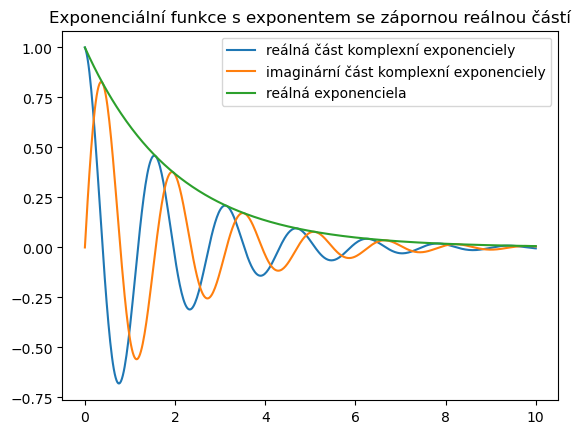

In [8]:
l = -.5+4j
t = np.linspace(0,10,500)
plt.plot(t,np.exp(l*t).real,label="reálná část komplexní exponenciely")
plt.plot(t,np.exp(l*t).imag,label="imaginární část komplexní exponenciely")
plt.plot(t,np.exp(l.real*t),label="reálná exponenciela")
plt.legend()
plt.title("Exponenciální funkce s exponentem se zápornou reálnou částí");

Experimentem s uvedeným kódem je možné ověřit, že vetší imaginární část se
projeví zrychlením oscilací a více záporná reálná část se projeví zrychlením
poklesu. Podobné grafy je možno nakreslit i pro kladnou vlastní hodnotu nebo pro
vlastní hodnotu s kladnou reálnou částí. Rozdíl je v tom, že v takovém případě
řešení buď roste do nekonečna, nebo osciluje se stále větší amplitudou.


### Nelineární autonomní systémy

Soustava $$X'=F(X)$$ diferenciálních rovnic, kde pravé strany nezávisí na čase,
se nazývá autonomní systém. 

Je-li $F(X_0)=0$, je možno systém v okolí bodu $X_0$ aproximovat lineárním systémem $$X'=J(X_0)(X-X_0),$$
kde $J(X_0)$ je Jacobiho matice funkce $F(X)$ v bodě $X_0$, tj. pro $F(X)=(F_1(X),\dots,F_n(X))^T$ je
$$J(X_0)=\left(\frac{\partial F_i(X_0)}{\partial x_j}\right).$$
O chování trajektorií v okolí stacionárního bodu tedy rozhodnou
vlastní čísla Jacobiho matice. Za předpokladu, že jsme relativně
daleko od případů, kdy se mění typ stacionárního bodu, tj. vlastní
čísla jsou navzájem různá, jsou nenulová a v případě komplexních
vlastních čísel mají nenulové reálné části, má původní nelineární
systém stejný typ stacionárního bodu jako lineární systém s Jacobiho
maticí. Nelineární systém tedy v jistém smyslu "zdědí" chování řešení
od své lineární aproximace pomocí Jacobiho matice. Je však nutno
připomenout, že aproximace pomocí Jacobiho matice je jenom lokální a
můžeme takto posoudit jenom řešení z nějakého okolí stacionárního
bodu.

Zejména tedy, pokud má Jacobiho matice všechny vlastní hodnoty
záporné, tak všechna řešení z nějakého okolí stacionárního bodu
konvergují do tohoto bodu. Pokud má všechny vlastní hodnoty kladné,
všechna řešení z nějakého okolí se naopak od stacionárního bodu
vzdalují. To platí i pro vlastní komplexní vlastní hodnoty, pouze se
mezi konvergencí a vzdalování přepíná podle znaménka reálné části
vlastních hodnot a řešení oscilují směrem ke stacionárnímu bodu nebo
od něj.

### Autonomní systémy v rovině

Pro autonomní systém v rovině {eq}`as_rovina` je možné chápat řešení jako
parametricky zadané rovinné křivky. Tyto křivky se nazývají trajektorie.
Trajektorie buď konvergují do nějakého stacionárního bodu, nebo mají alespoň
jednu ze složek neohraničenou, nebo konvergují k nějakému cyklu. Vektorové pole
definované vektorovou funkcí na pravé straně autonomního systému je tvořeno
šipkami, které míří stejným směrem jako trajektorie. Toto pole se nazývá směrové
pole autonomního systému a umožňuje odhadnout chování trajektorií a tím i
chování řešení. Na rozdíl od směrového pole diferenciální rovnice,  směrové
pole autonomního systému může obsahovat i šipky mířící doleva.

Vizualizaci řešení autonomního systému tedy můžeme provést dvěma způsoby.

* Vykreslit obě komponenty řešení jako funkce nezávislé proměnné. Výsledkem jsou
  tedy dvě křivky udávající časový průběh každé z komponent řešení.
* Vykreslit řešení jako parametrickou křivku. Výsledkem je tedy jedna křivka, ze
  které jsou patrné stavy, kterými systém postupně prochází, ale nemáme
  informaci o čase. Tato varianta je běžně používána a proto ji rozebereme níže. 

Obecný tvar autonomního systému v rovině je $$\begin{aligned}\frac{\mathrm dx}{\mathrm dt}&=f(x,y)\\\frac{\mathrm dy}{\mathrm dt}&=g(x,y)\\\end{aligned}.$$

Křivka nebo křivky vyhovující rovnici $$f(x,y)=0$$ se nazývají $x$-nulkliny a v
průsečíku trajektorie a $x$-nulkliny míří trajektorie svisle (hodnota $x$ se
mění nulovou rychlostí).

Křivka nebo křivky vyhovující rovnici $$g(x,y)=0$$ se nazývají $y$-nulkliny a v
průsečíku trajektorie a $y$-nulkliny míří trajektorie vodorovně (hodnota $y$ se
mění nulovou rychlostí).

V průsečíku nulklin je stacionární bod. 

Jacobiho matice $$J(x,y)=\begin{pmatrix}
\frac{\partial f}{\partial x} & \frac{\partial f}{\partial y} \\
\frac{\partial g}{\partial x} & \frac{\partial g}{\partial y} \end{pmatrix}$$
definuje lineární systém, který má v okolí každého bodu stejné chování
trajektorií jako systém nelineární. Toto má smysl dělat ve stacionárních bodech
a podle vlastních čísel Jacobiho matice v těchto stacionárních bodech rozhodneme
o chování trajektorií. (Mimo stacionární body je situace triviální, trajektorie
míří směrem definovaným pravou stranou systému a proto linearizaci
nepotřebujeme.)

Vlastní čísla Jacobiho matice ve stacionárním bodě jsou dvě a pokud jsou
komplexními čísly, potom mají stejnou reálnou část a imaginární část se liší
znaménkem. To znamená, že je jenom několik málo druhů možného chování
trajektorií v okolí stacionárních bodů. To dovoluje stacionární body
klasifikovat podle toho, zda přitahují či odpuzují trajektorie ze svého okolí a
zda toto přitahování či odpuzování souvisí s přikloněním se k nějakému pevnému
směru, nebo zda je realizováno oscilacemi s měnící se amplitudou. 

```{margin} Autonomní systém v rovině

[![](https://user.mendelu.cz/marik/manim/thumbs/AS_vlastni_cisla.jpg)](https://user.mendelu.cz/marik/manim/AS_vlastni_cisla/)

Dvourozměrné autonomní systémy můžeme analyzovat metodami založenými na klasifikaci stacionárních bodů. Typ stacionárního bodu (uzel, ohnisko, ...) a jeho stabilitu poznáme u lineárního systému z vlastních čísel matice, u nelineárního z vlastních čísel Jacobiho matice.

```

* Stabilní uzel je stacionární bod takový, že pro $t\to\infty$ všechny
  trajektorie z nějakého okolí konvergují do tohoto bodu bez oscilací.
  Nestabilní uzel má stejnou vlastnost, ale pro $t\to-\infty$, tedy trajektorie
  z tohoto bodu vycházejí. Stabilní uzel poznáme podle dvou záporných a
  nestabilní uzel podle dvou kladných reálných vlastních hodnot. 
* Stabilní a nestabilní ohnisko je stacionární bod se stejnou vlastností jako
  uzel, ale konvergence je spojena s oscilacemi okolo stacionárního bodu.
  Stabilní ohnisko poznáme podle dvou komplexně sdružených vlastních hodnot se
  zápornou reálnou částí, nestabilní ohnisko s kladnou reálnou částí. 
* Sedlo je stacionární bod, který má v každém  okolí pouze konečný počet
  trajektorií, které pro $t\to\pm\infty$ konvergují k tomuto bodu. Poznáme jej
  podle jedné kladné a jedné záporné vlastní hodnoty.
* Bod rotace je takový bod, v jehož každém okolí jsou cykly. Pokud navíc v
  nějakém okolí existují pouze cykly, nazývá se tento bod navíc střed.  Bod
  rotace souvisí s komplexně sdruženými vlastními čísly s nulovou reálnou částí,
  ale v těchto případech může stacionární bod být i ohniskem.